# Supervised Learning

## Part A: Classification

### Topic 1: Decision Tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Job dataset.csv')

In [3]:
df

,Company,Job,Degree,Salary above 100k
0,Google,Sales Executive,Bachelor,0
1,Google,Sales Executive,Master,0
2,Google,Business Manager,Bachelor,1
3,Google,Business Manager,Master,1
4,Google,Computer Programmer,Bachelor,0
5,Google,Computer Programmer,Master,1
6,ABC Pharma,Sales Executive,Master,0
7,ABC Pharma,Computer Programmer,Bachelor,0
8,ABC Pharma,Business Manager,Bachelor,0
9,ABC Pharma,Business Manager,Master,1


In [4]:
input = df.drop('Salary above 100k', axis = 'columns')
target = df['Salary above 100k']

In [5]:
input

,Company,Job,Degree
0,Google,Sales Executive,Bachelor
1,Google,Sales Executive,Master
2,Google,Business Manager,Bachelor
3,Google,Business Manager,Master
4,Google,Computer Programmer,Bachelor
5,Google,Computer Programmer,Master
6,ABC Pharma,Sales Executive,Master
7,ABC Pharma,Computer Programmer,Bachelor
8,ABC Pharma,Business Manager,Bachelor
9,ABC Pharma,Business Manager,Master


In [6]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: Salary above 100k, dtype: int64

#### Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
input['n_company'] = le_company.fit_transform(df['Company'])
input['n_job'] = le_job.fit_transform(df['Job'])
input['n_degree'] = le_degree.fit_transform(df['Degree'])

In [10]:
input

,Company,Job,Degree,n_company,n_job,n_degree
0,Google,Sales Executive,Bachelor,2,2,0
1,Google,Sales Executive,Master,2,2,1
2,Google,Business Manager,Bachelor,2,0,0
3,Google,Business Manager,Master,2,0,1
4,Google,Computer Programmer,Bachelor,2,1,0
5,Google,Computer Programmer,Master,2,1,1
6,ABC Pharma,Sales Executive,Master,0,2,1
7,ABC Pharma,Computer Programmer,Bachelor,0,1,0
8,ABC Pharma,Business Manager,Bachelor,0,0,0
9,ABC Pharma,Business Manager,Master,0,0,1


In [11]:
input.drop(['Company', 'Job', 'Degree'], axis = 1, inplace = True)

In [12]:
input

,n_company,n_job,n_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [13]:
from sklearn import tree

In [14]:
dtmodel = tree.DecisionTreeClassifier()

In [15]:
dtmodel.fit(input, target)

DecisionTreeClassifier()

In [16]:
dtmodel.score(input, target)

1.0

In [17]:
dtmodel.predict([[2, 2, 1]]) #Google, Sales Executive, Master

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [18]:
dtmodel.predict([[1, 1, 0]])

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
dtmodel.predict([[0, 0, 1]])

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Topic 2: K Nearest Neighbor

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [21]:
iris = load_iris()

In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df2 = pd.DataFrame(iris.data, columns = iris.feature_names)

In [26]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
df2['target'] = iris.target

In [28]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
df2['species name'] = df2.target.apply(lambda x: iris.target_names[x])

In [30]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [31]:
df2.iloc[40:80,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
40,5.0,3.5,1.3,0.3,0,setosa
41,4.5,2.3,1.3,0.3,0,setosa
42,4.4,3.2,1.3,0.2,0,setosa
43,5.0,3.5,1.6,0.6,0,setosa
44,5.1,3.8,1.9,0.4,0,setosa
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa


In [32]:
df2.iloc[90:120,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
90,5.5,2.6,4.4,1.2,1,versicolor
91,6.1,3.0,4.6,1.4,1,versicolor
92,5.8,2.6,4.0,1.2,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor
94,5.6,2.7,4.2,1.3,1,versicolor
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor


### Create subset data frame for each species iris

In [33]:
df_0 = df2[:50]
df_1 = df2[50:100]
df_2 = df2[100:]

In [34]:
df_0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [35]:
df_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [36]:
df_2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica


### Sepal width and Sepal length (Setosa vs Vesicolor)

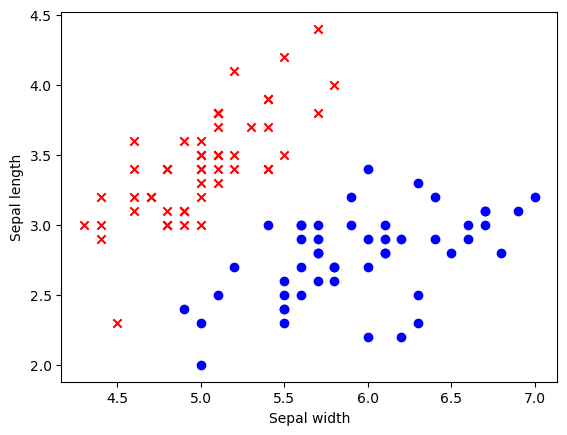

In [37]:
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'], color = 'red', marker = 'x')
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'], color = 'blue', marker = 'o')

### Petal width and Petal length (Setosa vs Vesicolor)

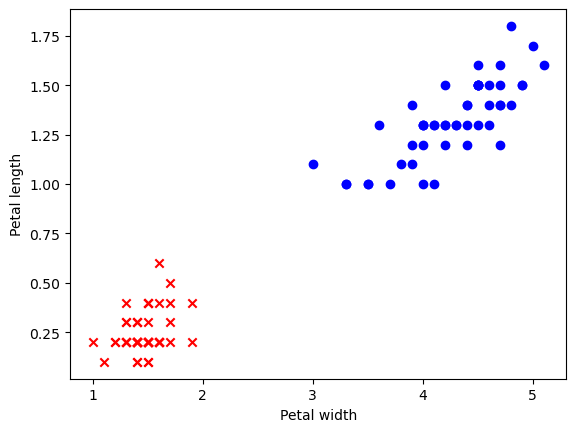

In [38]:
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], color = 'red', marker = 'x')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color = 'blue', marker = 'o')

### Train test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df2.drop(['target', 'species name'], axis = 1)
y = df2['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Import from KNearestNeighbor

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.score(X_test, y_test)

1.0

In [46]:
y_pred = knn.predict(X_test)

### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

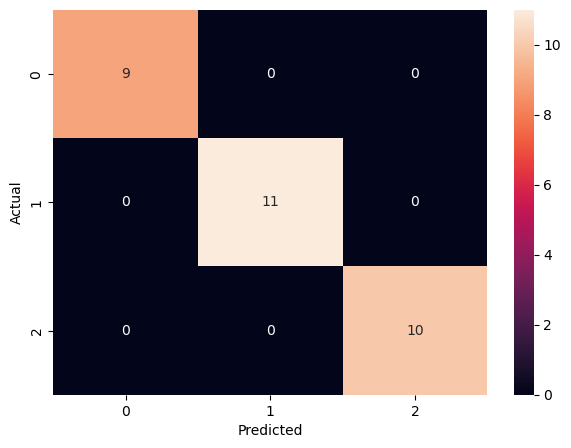

In [50]:
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')